In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

In [160]:
df = pd.read_csv('data/washington_hikes_clean.csv')
df['hike_id'] = range(len(df))

In [162]:
features = []
for f in df['features']:
    flist = f.strip('[').strip(']').split(',')
    features.extend(flist)

In [163]:
features = list(np.unique([f.lstrip() for f in features if f != '']))

In [164]:
features

['Coast',
 'Dogs allowed on leash',
 'Established campsites',
 'Fall foliage',
 'Good for kids',
 'Lakes',
 'Mountain views',
 'Old growth',
 'Ridges/passes',
 'Rivers',
 'Summits',
 'Waterfalls',
 'Wildflowers/Meadows',
 'Wildlife']

In [165]:
for f in features:
    df[f] = [1 if f in t else 0 for t in df['features']]

In [166]:
df.head()

,Unnamed: 0,hike_name,region,length,elevation gain,rating,number_votes,features,"pass(0-no pass, 1- pass required)",which_pass,...,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife
0,0,Grand Park via Lake Eleanor,Mount Rainier Area -- NE - Sunrise/White River,"8.0 miles, roundtrip",1100.0,4.25 out of 5,12.0,"[Mountain views, Wildlife, Established campsites]",0,No pass or permit required,...,0,0,1,0,0,0,0,0,0,1
1,1,Shellrock Pass,North Cascades -- Pasayten,NaN,NaN,2.33 out of 5,3.0,[Dogs allowed on leash],0,No pass or permit required,...,0,0,0,0,0,0,0,0,0,0
2,2,Soda Peaks Lake,Southwest Washington -- Lewis River Region,"7.0 miles, roundtrip",2500.0,3.00 out of 5,4.0,"[Old growth, Lakes]",1,Northwest Forest Pass required,...,0,1,0,1,0,0,0,0,0,0
3,3,Shorthorn,South Cascades -- Mount Adams Area,"5.6 miles, roundtrip",1400.0,3.67 out of 5,3.0,"[Mountain views, Dogs allowed on leash]",1,Northwest Forest Pass required,...,0,0,1,0,0,0,0,0,0,0
4,4,West Fork Teanaway River,Snoqualmie Region -- Salmon La Sac/Teanaway,"9.6 miles, one-way",2800.0,2.75 out of 5,4.0,"[Ridges/passes, Wildlife, Established campsite...",1,Northwest Forest Pass required,...,1,0,1,0,1,0,0,0,0,1


In [83]:
df.columns

Index([u'Unnamed: 0', u'hike_name', u'region', u'length', u'elevation gain',
       u'rating', u'number_votes', u'features',
       u'pass(0-no pass, 1- pass required)', u'which_pass',
       u'time_from_seattle', u'url', u'latlong', u'numReports', u'hike_desc',
       u'stars', u'total_dist', u'lat_long', u'hike_id', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife'],
      dtype='object')

In [167]:
df.drop(labels=['Unnamed: 0'], inplace=True, axis=1)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 32 columns):
hike_name                            3385 non-null object
region                               3383 non-null object
length                               1593 non-null object
elevation gain                       1593 non-null float64
rating                               3384 non-null object
number_votes                         3384 non-null float64
features                             3385 non-null object
pass(0-no pass, 1- pass required)    3385 non-null int64
which_pass                           1520 non-null object
time_from_seattle                    2136 non-null float64
url                                  3385 non-null object
latlong                              2194 non-null object
numReports                           3384 non-null float64
hike_desc                            1444 non-null object
stars                                3384 non-null float64
total_dist         

## PCA and clustering

In [86]:
X = df[[u'elevation gain', u'number_votes',  
       u'time_from_seattle', u'numReports', 
       u'stars', u'total_dist', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife']]

In [87]:
X = X.dropna()
pca = PCA(n_components=8).fit_transform(X)

In [88]:
kmeans = KMeans(n_clusters=5).fit(X)

In [90]:
X['kmeans_label'] = kmeans.labels_

In [91]:
color_map = {0: 'green', 1: 'red', 2: 'yellow', 3: 'blue', 4: 'purple'}

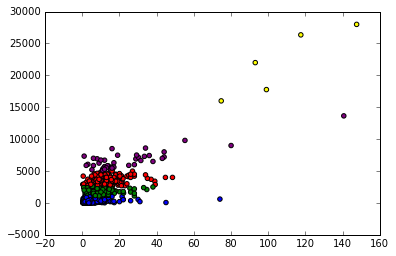

In [97]:
plt.scatter(X['total_dist'],X['elevation gain'], c=X['kmeans_label'].map(color_map))

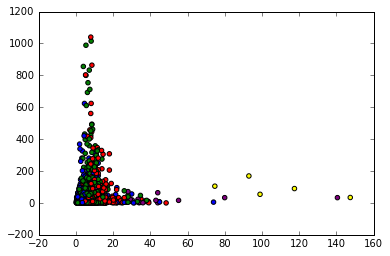

In [98]:
plt.scatter(X['total_dist'],X['numReports'], c=X['kmeans_label'].map(color_map))

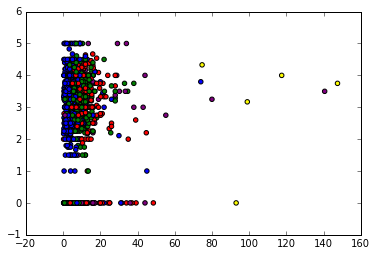

In [101]:
plt.scatter(X['total_dist'],X['stars'], c=X['kmeans_label'].map(color_map))

## Trying a linear regression model

In [106]:
import statsmodels.api as sms
from sklearn.cross_validation import train_test_split

In [121]:
df = df.dropna()
X = df[[u'elevation gain', u'number_votes',  
       u'time_from_seattle', u'numReports', 
        u'total_dist', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife']]
X = sms.add_constant(X)
y = df.stars

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = sms.OLS(y_train, X_train).fit()

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     6.000
Date:                Fri, 29 Jul 2016   Prob (F-statistic):           3.16e-14
Time:                        10:09:11   Log-Likelihood:                -1158.6
No. Observations:                 706   AIC:                             2357.
Df Residuals:                     686   BIC:                             2448.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.7963      0.128     21.824      0.000       2.545       3.048
elevation gain         5.263e-05    4.3e-05      1.223      0.222   -3.19e-05       0.000
number_votes              0.0092      0.006      1.597      0.111      -0.002       0.020
time_from_seattle        -0.0005      0.000     -1.238      0.216      -0.001       0.000
numReports                0.0017      0.001      1.865      0.063   -8.82e-05       0.003
total_dist               -0.0162      0.010     -1.665      0.096      -0.035       0.003
Coast                     0.0401      0.377      0.106      0.916      -0.701       0.781
Dogs allowed on leash    -0.0710      0.101     -0.701      0.484      -0.270       0.128
Established campsites     0.2884      0.135      2.136      0.033       0.023       0.554
Fall foliage              0.0819      0.143      0.574      0.566      -0.198       0.362
Good for kids            -0.1867      0.117     -1.593      0.112      -0.417       0.043
Lakes                     0.0220      0.115      0.191      0.848      -0.204       0.248
Mountain views            0.2492      0.116      2.145      0.032       0.021       0.477
Old growth               -0.1178      0.117     -1.008      0.314      -0.347       0.112
Ridges/passes            -0.1380      0.161     -0.857      0.392      -0.454       0.178
Rivers                    0.0443      0.143      0.309      0.757      -0.237       0.325
Summits                   0.1674      0.141      1.190      0.234      -0.109       0.444
Waterfalls                0.3863      0.167      2.319      0.021       0.059       0.713
Wildflowers/Meadows      -0.2443      0.319     -0.767      0.444      -0.870       0.381
Wildlife                 -0.0231      0.106     -0.218      0.828      -0.231       0.185
==============================================================================
Omnibus:                       92.762   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.467
Skew:                          -1.016   Prob(JB):                     2.09e-28
Kurtosis:                       3.452   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, LassoLars
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [133]:
lasso = ['Lasso', LassoCV()]
ridge = ['Ridge', RidgeCV()]
linreg = ['Linear Regression', LinearRegression()]
models = [lasso, ridge, linreg]

In [136]:
for mod in models:
    print mod[0]
    m = mod[1].fit(X_train, y_train)
    print 'R^2: ', m.score(X_train, y_train)
    print 'MSE: ', mean_squared_error(y_test, m.predict(X_test))
    print '-----------------------------------------------------'

Lasso
R^2:  0.120353005091
MSE:  1.65298535073
-----------------------------------------------------
Ridge
R^2:  0.153044937274
MSE:  1.69545468843
-----------------------------------------------------
Linear Regression
R^2:  0.153340446642
MSE:  1.69635982058
-----------------------------------------------------


In [147]:
from sklearn.ensemble import GradientBoostingRegressor

In [148]:
gb = GradientBoostingRegressor(min_samples_leaf=3, random_state=0).fit(X_train, y_train)

In [149]:
feat_imp = gb.feature_importances_

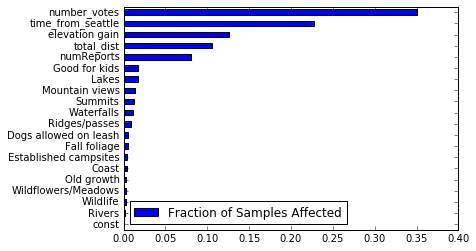

In [153]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gb.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

In [154]:
df.corr()

,elevation gain,number_votes,"pass(0-no pass, 1- pass required)",time_from_seattle,numReports,stars,total_dist,hike_id,Coast,Dogs allowed on leash,...,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife
elevation gain,1.000000,0.049612,0.165692,0.045596,0.120914,0.126658,0.708071,0.005229,-0.076540,-0.075865,...,-0.443637,0.101430,0.288648,0.069843,0.233542,0.142266,0.302753,0.034468,0.204914,-0.053972
number_votes,0.049612,1.000000,0.121968,-0.134948,0.883255,0.305609,-0.032081,-0.271225,0.026441,0.113781,...,0.046940,0.111019,0.128263,0.140036,0.034948,0.118468,0.084053,0.251227,0.107135,-0.037484
"pass(0-no pass, 1- pass required)",0.165692,0.121968,1.000000,0.111328,0.138609,0.188611,0.136124,0.043493,0.015914,-0.162113,...,-0.199302,0.112361,0.150418,0.063719,0.082511,0.125804,0.044209,0.082534,0.054325,-0.036851
time_from_seattle,0.045596,-0.134948,0.111328,1.000000,-0.194131,-0.080253,0.128348,0.055694,0.025292,-0.082116,...,-0.098968,-0.035919,0.119121,-0.014358,0.071913,-0.007483,0.020147,0.005650,0.006335,0.051060
numReports,0.120914,0.883255,0.138609,-0.194131,1.000000,0.322978,0.000798,-0.273729,0.001496,0.125530,...,0.002751,0.140471,0.178349,0.181640,0.050021,0.115150,0.108111,0.277737,0.129109,-0.056085
stars,0.126658,0.305609,0.188611,-0.080253,0.322978,1.000000,0.032175,-0.182833,0.008442,-0.004754,...,-0.075293,0.091661,0.148385,0.078626,0.031484,0.066036,0.105925,0.150321,0.091252,-0.041587
total_dist,0.708071,-0.032081,0.136124,0.128348,0.000798,0.032175,1.000000,0.016355,-0.012236,-0.066199,...,-0.290515,0.131543,0.195290,0.076782,0.227627,0.199921,0.104411,0.070429,0.189456,0.037988
hike_id,0.005229,-0.271225,0.043493,0.055694,-0.273729,-0.182833,0.016355,1.000000,-0.000224,-0.121750,...,-0.060698,0.021583,0.035099,-0.094229,0.027917,-0.041818,-0.007028,-0.107574,-0.036415,0.006671
Coast,-0.076540,0.026441,0.015914,0.025292,0.001496,0.008442,-0.012236,-0.000224,1.000000,-0.010328,...,-0.035661,-0.050713,-0.076067,-0.007352,-0.044982,0.002822,0.013333,-0.044112,-0.020321,-0.064989
Dogs allowed on leash,-0.075865,0.113781,-0.162113,-0.082116,0.125530,-0.004754,-0.066199,-0.121750,-0.010328,1.000000,...,0.226368,0.032123,0.033267,0.063957,0.026417,-0.058491,0.058927,0.097008,0.018633,0.060771


Looks like number of votes and number of reports is highly correlated.  Will remove number of votes.

In [157]:
## Features that will be used on my model
feat_scores[-5:]

,Fraction of Samples Affected
numReports,0.080441
total_dist,0.105389
elevation gain,0.126137
time_from_seattle,0.228081
number_votes,0.350260


## Create item dataframe

In [168]:
df = pd.read_csv('data/washington_hikes_clean.csv')

df['hike_id'] = range(len(df))
item_data = df[['hike_name', 'hike_id', 'numReports', 'total_dist', 'elevation gain', 'time_from_seattle']]

In [169]:
item_data.to_csv('data/itemData.csv')

In [171]:
from gensim import corpora, models, similarities

In [173]:
corpus = corpora.MmCorpus
tfidf = models.TfidfModel(corpus)

TypeError: 'type' object is not iterable